# Random Forests - Regression

În continuare o să ne ocupăm de partea de Regression cu Random Forest. Pentru asta o să folosim un set de date care conține anumite valori despre densitatea unei roci. O altă valoare reprezintă valoarea în nHz a unui semna X-ray care este reflectat de către roca respectivă. Distribuția acestor date este una destul de unicată (o să vedem când facem un plot la date). Prin utilizarea acestui set de date dorim să arătăm faptul că nu orice model de Regresie de Machine Learning este bun pentru orice tip de date. Prin urmare o să creem câte un model din fiecare dintre modelele pe care le-am parcurs pentru Regression pentru a vedea diferența de performanță dintre ele

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/DATA/rock_density_xray.csv')

In [7]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [8]:
df.rename(columns={'Rebound Signal Strength nHz': 'signal', 'Rock Density kg/m3':  'density'}, inplace=True)

In [9]:
df.head()

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='signal', ylabel='density'>

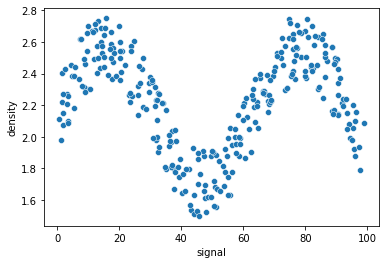

In [10]:
sns.scatterplot(data=df, x='signal', y='density')

După cum am specificat, aceste date sunt puțin diferite din cauza distribuției acestora. Se poate vedea că au o formă de val, iar pentru început o să vedem dacă putem să folosim un model de LinearRegression pentru a crea un model, ceea ce nu prea are sens deoarece acel tip de model creează o linie dreaptă pentru a face fit la datele respective.

In [11]:
X = df['signal']
y = df['density']

Din moment ce setul de date are doar un feature, putem să extragem acel feature ca și valoare de X, la fel cum facem selectarea pentru labels

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model_lr = LinearRegression()

In [16]:
model_lr.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[94.25806323 73.31932583 56.3218745  79.8088233  36.14102574  1.4283978
 77.26835176 69.83188337 43.01519326 57.73885338 49.42788121 83.10000489
 78.45459768 23.68141687 51.54130872 43.93440205  4.89748442  0.70022731
 89.64797256 32.18287734 45.97491816 90.40106504 72.17029963 15.16243432
 29.79010453 80.33899095 12.08265375 32.50624561 81.89697226  9.89157994].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Deoarece am selectat X ca și fiind df['signal'], nu putem să facem fit la modelul respectiv. Din fericire, eroare ne și spune cum să rezolvăm această problemă, trebuie să facem un reshape la acel set de date X folosind array.reshape(-1, 1)

In [17]:
X = df['signal'].values.reshape(-1, 1)
y = df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
model_lr.fit(X_train, y_train)

LinearRegression()

Folosim df['signal'].values deoarece așa transformăm dintr-un Series într-un array de elemente. În acest moment putem să facem fit la modelul respectiv

In [18]:
lr_preds = model_lr.predict(X_test)
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [21]:
df.head()

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [22]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

Din valorile erorilor pe care le avem, modelul pare că se descurcă binișor, asta la prima vedere. Ceea ce este ciudat este faptul că valorile care au fost rezultate de la metida predict sunt toate foarte apropiate. Pentru a verifica performanța modelului, o să îi oferim acestuia un array de valori de la 0 la 100 pentru a face predicții pentru ele, valori care o să reprezinte acel signal

In [23]:
signal_range = np.arange(0, 100)
signal_preds = model_lr.predict(signal_range.reshape(-1, 1))

signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

Se poate observa că datele acestea sunt extrem de apropiate (datele care au fost prezise de către model), deși i-am oferit un range de valori de la 0 la 100. O să facem un plot la aceste rezultate peste plot-ul inițial cu distribuția datelor

<AxesSubplot:xlabel='signal', ylabel='density'>

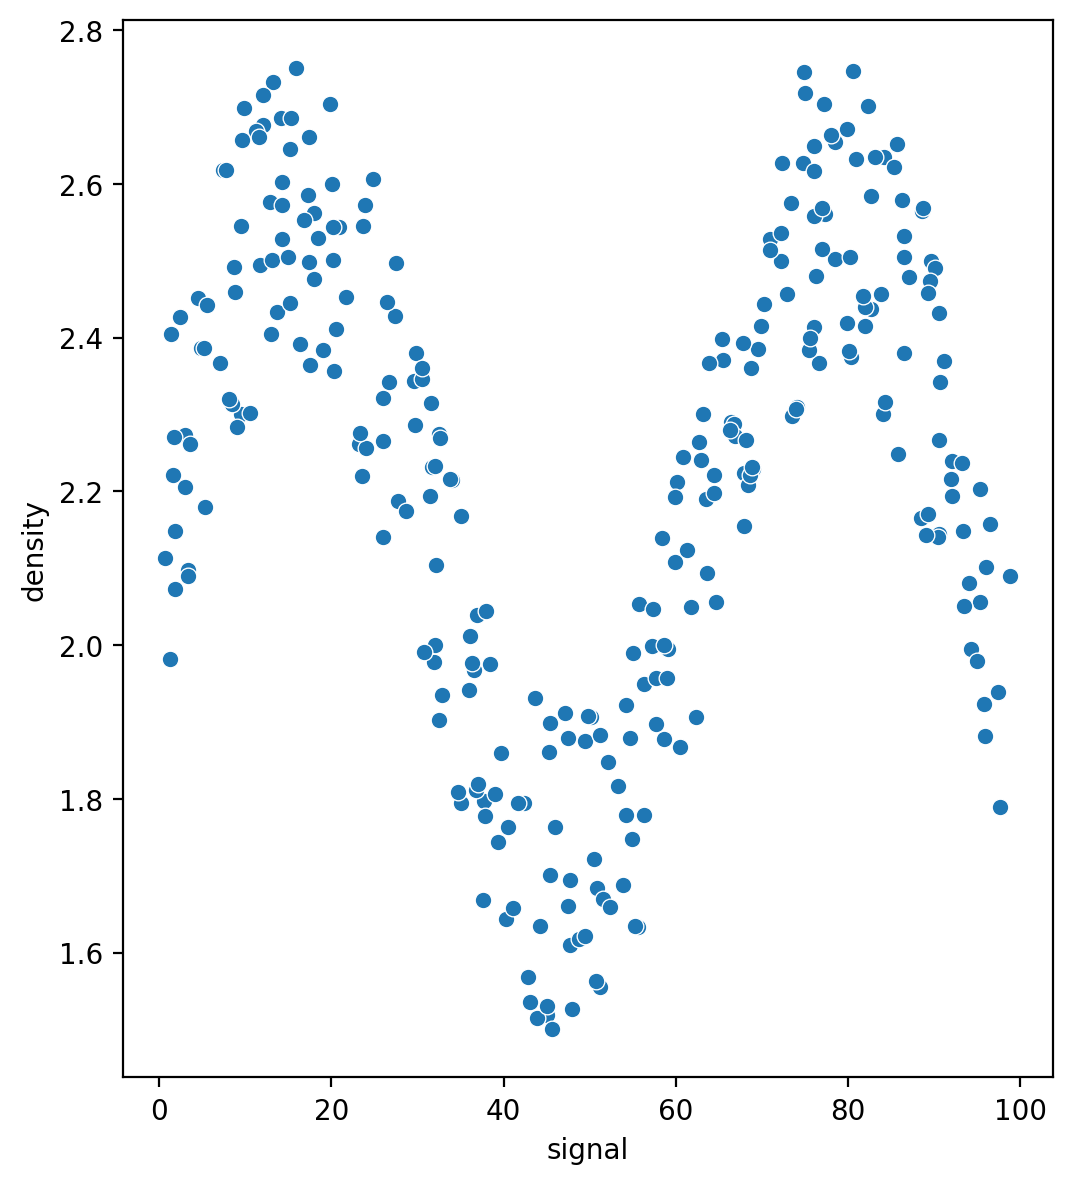

In [24]:
plt.figure(figsize=(6, 7), dpi=200)
sns.scatterplot(data=df, x='signal', y='density')

Din graficul de mai sus obsevăm că datele din coloana de signal sunt și ele cuprinse între 0 și 100, dar ca și density au valori între 1.4 și 2.8, iar rezultatele noastre au fost toate cu 2.2. În continuare o să creem peste plot-ul pentru acele rezultate

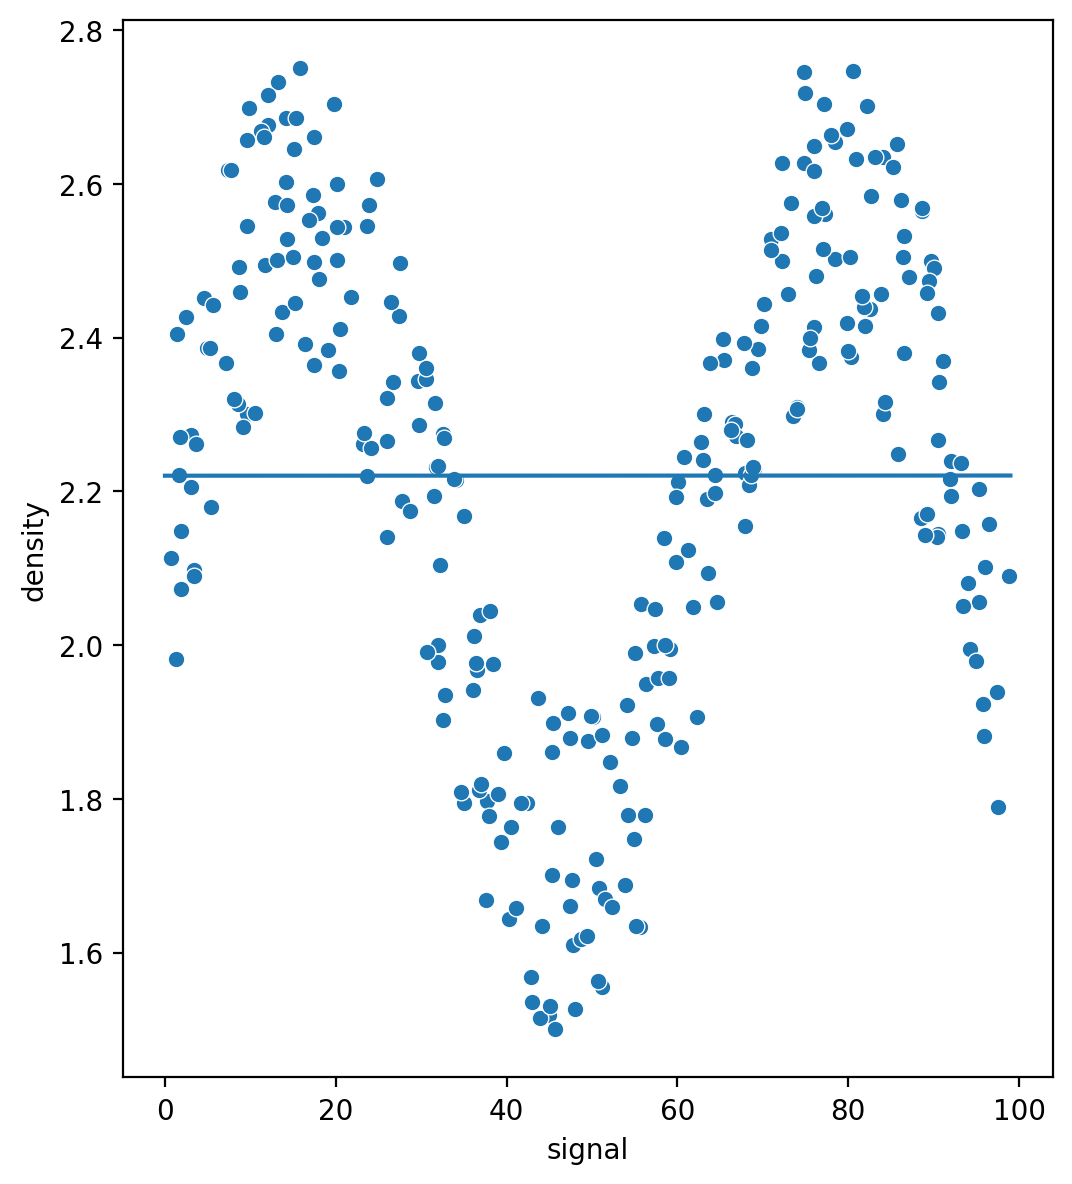

In [25]:
plt.figure(figsize=(6, 7), dpi=200)
sns.scatterplot(data=df, x='signal', y='density')

plt.plot(signal_range, signal_preds)

Se poate observa că acea linie este una aproape perfect dreaptă, modelul nu a reușit să facă fit la datele respective după distribuția lor. Prin urmare, acest tip de model nu este unul tocmai potrivit pentru acest set de date. În urma acestui model de LinearRegression am putut observa faptul că eroarea care apare nu este una rea deloc, aceast ne poate induce în eroare. Ne-am dat seama de faptul că modelul nu este unul tocmai bun în momentul în care am vizualizat rezultatele și am văzut că toate sunt apropiate de valoarea 2.22 și mai ales după ce am făcut un grafic cu valorile rezultate în comparație cu datele cu care am lucrat. O să încercăm să reparăm aceste probleme utilizând un model de Polynomial Regression

In [43]:
def run_model(model, X_train, y_train, X_test, y_test):

    # Fit the model
    model.fit(X_train, y_train)

    # Get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    print(f'RMSE = {rmse}')
    print(f'MAE = {mae}')

    # Plot results
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))

    plt.figure(figsize=(4, 3), dpi=200)
    sns.scatterplot(x='signal', y='density', data=df)
    plt.plot(signal_range, output)


RMSE = 0.2570051996584629
MAE = 0.211198973318633


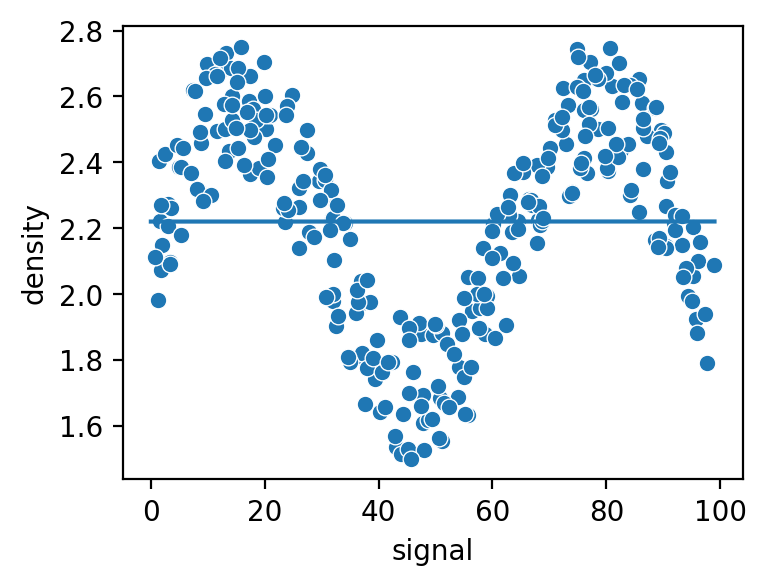

In [44]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

Pentru a ne ușura munca am creat o funcție care ne antrenează un model, calculează metricile pentru acest model și de asemenea și creează acel plot cu rezultatele în comparație cu datele pe care l-am antrenat. În continuare o să creem un model de PolynomialRegression. Mai exact o să creem un pipeline prin care o să și transformăm datele respective

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

Scikit-Learn în modulul de sklearn.pipeline are metoda make_pipeline prin care putem să facem atât partea de preprocesare de date cât și să creem un model. Variabila care este utilizată pentru a crea acest pipeline se poate folosi în locul variabilei de model (adică putem utiliza pipe.predict()). Am creat pentru început un model care are valoarea 2 pentru acel degree la polynomial. În continuare o să afișăm rezultatele pentru acest model

RMSE = 0.28173095637255463
MAE = 0.22903105443511165


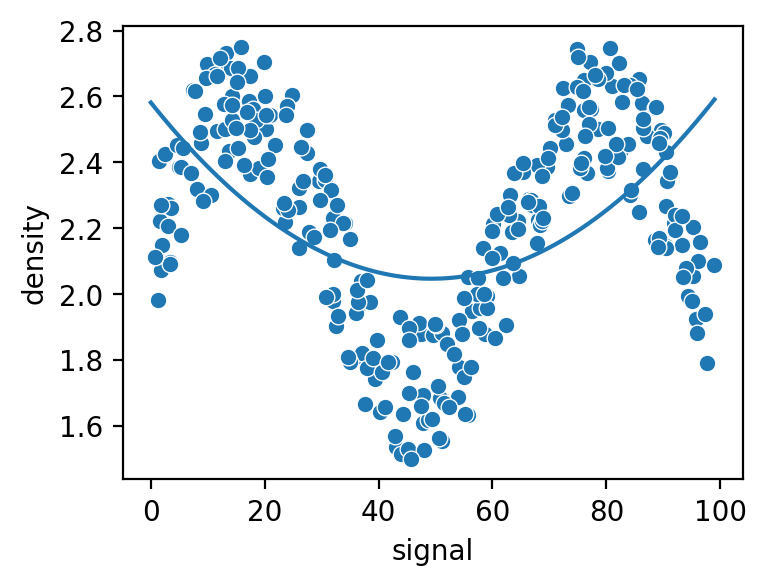

In [47]:
run_model(pipe, X_train, y_train, X_test, y_test)

Se poate observa faptul că avem o eroare de RMSE=0.28. Putem să ne jucăm cu gradul ecuației pentru a afla valoarea cea mai potrivită pentru acest model. O să crem un model și cu valoarea 10 la acea ecuație

RMSE = 0.14034843686496898
MAE = 0.12467013990225653


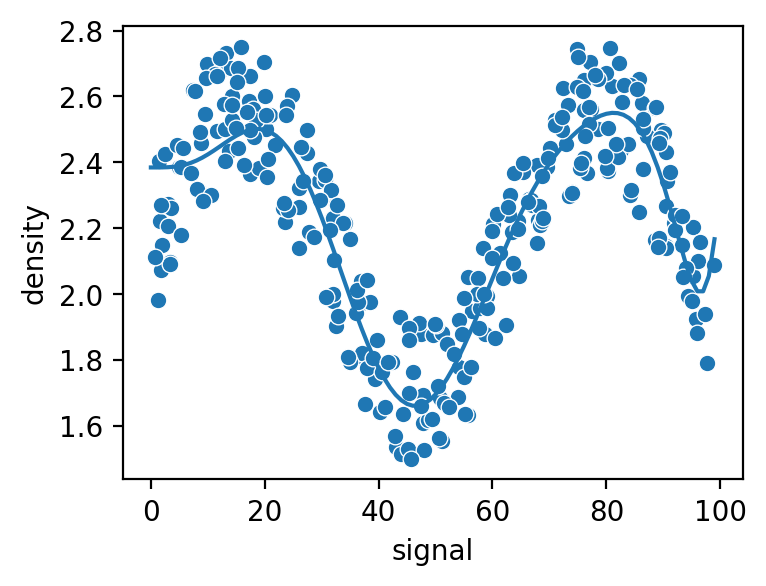

In [49]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

Valoarea erorii a scăzut, însă la capitolul de Polynomia Regression am aflat faptul că de multe ori o valoare așa de mare pentru ecuație înseamnă că modelul face overfit la datele respective și primește prea mult zgomot la partea de antrenare. Este recomandat să utilizăm un grid search și să facem un plot la erorile acestor modele pentru a putea vedea cum anume se comportă modelul respectiv și cam care este limita până la care putem crește gradul ecuației.

## Recapitulare

În cadrul acestei secțiuni am aflat următoarele lucruri:

    1. Atunci când avem ca și input pentru un model la predict sau fit un Series, atunci trebuie să facem reshape la acele elemente

        X = df['density'].values.reshape(-1, 1)

    2. Nu orice model se potrivește la orice tip de date. Modelul de LinearRegression nu este potrivit pentru un set de date unde distribuția spațială a datelor are formă de valuri. Mai potrivit este un model de PolynomialRegression pentru acest tip de date

    3. Cum anume putem utiliza un pipeline pentru a transforma datele cu o ecuație polynomială și a crea un model de LinearRegression

        De unde să importăm comanda care ne creează pipeline-ul

            from sklearn.pipeline import make_pipeline

        Cum să creem un pipeline pentru modelul de PolynomialRegression

            pipe = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

        Acest pipeline se poate utiliza ca și un model de Machine Learning

            pipe.fit()

            pipe.predict()
